# AirBnB NY Locations Data Case Study

In this final project, you task will be to take the data provided and find evidence to answer the following questions.

1. How many neighborhood groups are there and which shows up the most?
2. Are private rooms the most popular in Manhattan?
3. Who are the top 10 busiest hosts based on number of reviews per month?
4. Which neighorhood group has the highest average price? Plot the average prices in a professional looking bar chart
5. What is the most expensive neighbourhood in each neighbourhood group?
6. Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
7. Who currently has no (zero) availability with a review count of 100 or more?
8. If each host rents all of their properties for the night, which 5 make the most that night?
9. When did Danielle from Queens last receive a review?
10. Display a bar chart showing the number of each type of room in the Bronx

You will be given **4 hours** to complete this assignment. 
**Be Advised** I will go dark for this entire assignment time period. That said, any questions that you would like to ask about the data, or the project **MUST** be asked before the time starts. Once the time has started, I can no longer give information.

This is to simulate what you will face when you are out in the wild. 

Happy Coding!

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
air_bnb = pd.read_csv('./AB_NYC_2019.csv')

In [4]:
# How many neighbourhood groups / which shows up the most
air_bnb.value_counts(['neighbourhood_group'])

neighbourhood_group
Manhattan              21661
Brooklyn               20104
Queens                  5666
Bronx                   1091
Staten Island            373
dtype: int64

In [6]:
# Are private rooms the most popular in Manhattan?
private_rooms = air_bnb[(air_bnb['neighbourhood_group'] =='Manhattan')]
private_rooms.groupby('room_type').count()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
room_type,,,,,,,,,,,,,,,
Entire home/apt,13199,13193,13199,13196,13199,13199,13199,13199,13199,13199,13199,9967,9967,13199,13199
Private room,7982,7979,7982,7976,7982,7982,7982,7982,7982,7982,7982,6309,6309,7982,7982
Shared room,480,480,480,480,480,480,480,480,480,480,480,356,356,480,480


In [11]:
# Who are the top 10 busiest hosts based on number of reviews per month?
top_ten = air_bnb.groupby(['host_id', 'host_name']).sum()['reviews_per_month'].nlargest(10)
top_host_df=pd.DataFrame(top_ten)
top_host_df

,,reviews_per_month
host_id,host_name,
219517861,Sonder (NYC),397.56
244361589,Row NYC,111.72
232251881,Lakshmee,80.63
26432133,Danielle,68.02
137274917,David,62.89
224414117,Gabriel,59.10
156948703,Asad,56.44
344035,Brooklyn& Breakfast -Len-,56.00
156684502,Nalicia,54.38


In [13]:
# Which neighborhood group has the highest avg price and plot the average prices in a bar chart
avg_prices = air_bnb.groupby('neighbourhood_group').mean()['price'].nlargest()
avg_prices_df = pd.DataFrame(avg_prices)
avg_prices_df

,price
neighbourhood_group,
Manhattan,196.875814
Brooklyn,124.383207
Staten Island,114.812332
Queens,99.517649
Bronx,87.496792


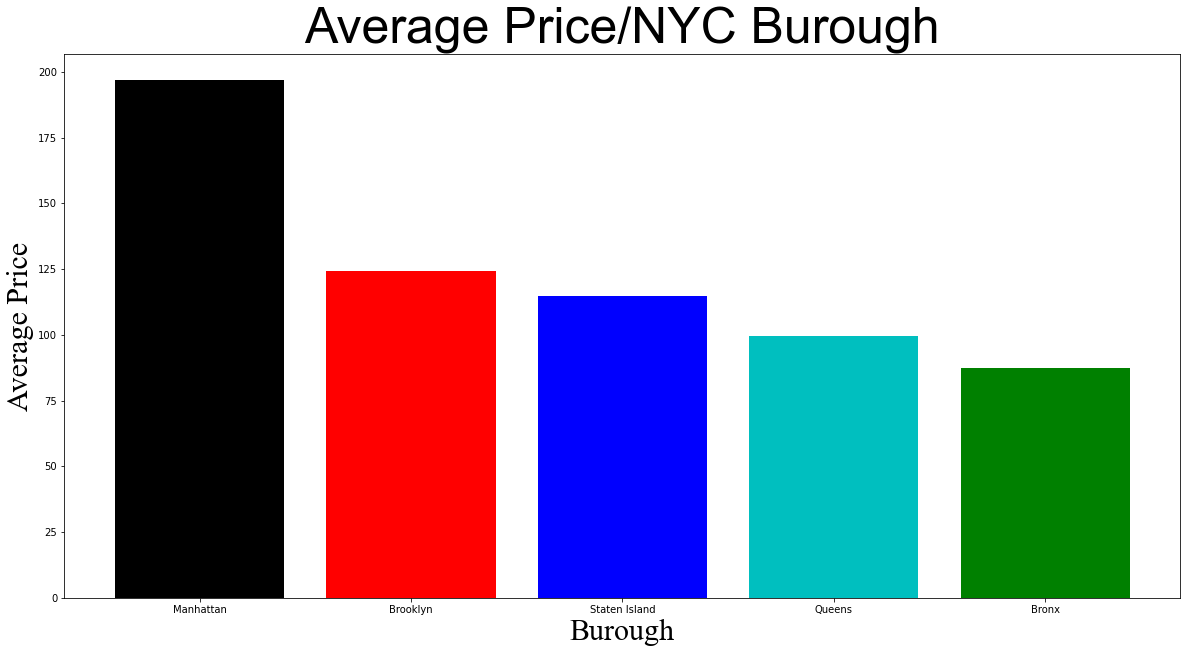

In [29]:
plt.figure(figsize=(20,10))
plt.bar(avg_prices.index, avg_prices, color=['k', 'r', 'b', 'c', 'g'])
plt.title('Average Price/NYC Burough', fontname='Arial', fontsize=50)
plt.ylabel('Average Price', fontname='Times New Roman', fontsize=30)
plt.xlabel('Burough', fontname='Times New Roman', fontsize=30)
plt.show()

In [31]:
# What is the most expensive neighbourhood in each neighbourhood_group
most_expensive = air_bnb.groupby(['neighbourhood_group', 'neighbourhood']).mean()
most_expensive

id       host_id   latitude  \
neighbourhood_group neighbourhood                                          
Bronx               Allerton       2.007729e+07  1.052045e+08  40.865292   
                    Baychester     2.215566e+07  1.391305e+08  40.873616   
                    Belmont        2.690317e+07  1.468852e+08  40.855062   
                    Bronxdale      2.190473e+07  1.105278e+08  40.854731   
                    Castle Hill    3.304754e+07  2.257518e+08  40.816889   
...                                         ...           ...        ...   
Staten Island       Tottenville    1.823501e+07  7.724669e+07  40.507350   
                    West Brighton  1.885742e+07  6.569042e+07  40.631932   
                    Westerleigh    2.070684e+07  1.482153e+08  40.613895   
                    Willowbrook    2.708802e+07  1.158272e+08  40.598860   
                    Woodrow        1.798271e+06  9.430973e+06  40.538840   

                                   longitude       price  minimum_nights  \
neighbourhood_group neighbourhood                                          
Bronx               Allerton      -73.858727   87.595238        2.214286   
                    Baychester    -73.842967   75.428571        2.428571   
                    Belmont       -73.887109   77.125000        3.375000   
                    Bronxdale     -73.866287   57.105263        2.894737   
                    Castle Hill   -73.847000   63.000000        2.333333   
...                                      ...         ...             ...   
Staten Island       Tottenville   -74.239390  144.857143        2.428571   
                    West Brighton -74.115959   80.555556        5.166667   
                    Westerleigh   -74.133665   71.500000        2.500000   
                    Willowbrook   -74.132170  249.000000        4.000000   
                    Woodrow       -74.198260  700.000000        7.000000   

                                   number_of_reviews  reviews_per_month  \
neighbourhood_group neighbourhood                                         
Bronx               Allerton               42.928571           1.834054   
                    Baychester             44.285714           2.206667   
                    Belmont                12.333333           1.888000   
                    Bronxdale              24.105263           1.916875   
                    Castle Hill            13.111111           2.775000   
...                                              ...                ...   
Staten Island       Tottenville            19.857143           1.146000   
                    West Brighton          36.444444           1.443750   
                    Westerleigh             9.000000           0.505000   
                    Willowbrook             9.000000           0.800000   
                    Woodrow                 0.000000                NaN   

                                   calculated_host_listings_count  \
neighbourhood_group neighbourhood                                   
Bronx               Allerton                             2.761905   
                    Baychester                           1.714286   
                    Belmont                              1.583333   
                    Bronxdale                            1.105263   
                    Castle Hill                          5.666667   
...                                                           ...   
Staten Island       Tottenville                          1.285714   
                    West Brighton                        2.888889   
                    Westerleigh                          1.000000   
                    Willowbrook                          2.000000   
                    Woodrow                              1.000000   

                                   availability_365  
neighbourhood_group neighbourhood                    
Bronx               Allerton             163.666667  
                    Baychester 

In [33]:
air_bnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [35]:
# Which host has the highest minimum rental? *minimal rental is based on price and minimum nights
air_bnb['minimum_rental'] = air_bnb['minimum_nights'] * air_bnb['price']
air_bnb.nlargest(5, 'minimum_rental')
air_bnb[['host_name','minimum_nights','price']].nlargest(10, ['price'], keep='last').sort_values('minimum_nights').head(1)

,host_name,minimum_nights,price
4377,Jessica,1,8000


In [36]:
# Who has no (zero) availability with a review count of 100 or more
air_bnb[(air_bnb['availability_365'] == 0) & (air_bnb['number_of_reviews'] >= 100)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0,158
94,20913,Charming 1 bed GR8 WBurg LOCATION!,79402,Christiana,Brooklyn,Williamsburg,40.70984,-73.95775,Entire home/apt,100,5,168,2018-07-22,1.57,1,0,500
132,30031,NYC artists’ loft with roof deck,129352,Sol,Brooklyn,Greenpoint,40.73494,-73.95030,Private room,50,3,193,2019-05-20,1.86,1,0,150
174,44221,Financial District Luxury Loft,193722,Coral,Manhattan,Financial District,40.70666,-74.01374,Entire home/apt,196,3,114,2019-06-20,1.06,1,0,588
180,45556,"Fort Greene, Brooklyn: Center Bedroom",67778,Doug,Brooklyn,Fort Greene,40.68863,-73.97691,Private room,65,2,206,2019-06-30,1.92,2,0,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29581,22705516,The Quietest Block in Manhattan :),127740507,Kathleen,Manhattan,Harlem,40.83102,-73.94181,Private room,65,2,103,2019-07-07,5.89,2,0,130
30461,23574142,queens get away!!,176185168,Janet,Queens,Laurelton,40.68209,-73.73662,Private room,65,1,119,2018-12-24,7.79,1,0,65
31250,24267706,entire sunshine of the spotless mind room,21074914,Albert,Brooklyn,Bedford-Stuyvesant,40.68234,-73.91318,Private room,49,1,102,2019-07-05,6.73,3,0,49
32670,25719044,COZY Room for Female Guests,40119874,Stephany,Brooklyn,Prospect-Lefferts Gardens,40.66242,-73.94417,Private room,48,1,131,2019-05-31,9.97,2,0,48


In [37]:
# If each host rents all of their properties for the night, which 5 make the most that night?
air_bnb.groupby(['host_id', 'host_name']).sum().nlargest(5, 'price')

,,id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
host_id,host_name,,,,,,,,,,
219517861,Sonder (NYC),10885561678,13316.25823,-24198.18856,82795,4353,1281,397.56,106929,98588,950453
107434423,Blueground,7210036953,9451.60418,-17166.13165,70331,7470,29,6.04,53824,58884,2258580
156158778,Sally,332529233,488.73929,-887.71735,37097,12,1,1.00,144,776,37097
205031545,Red Awning,1415225676,1996.92821,-3624.34656,35294,750,127,21.21,2401,10796,525450
30283594,Kara,1611854192,4931.41347,-8952.50779,33581,3767,65,3.94,14641,37924,1164243


In [40]:
# When did Danielle from Queens last receive a review?
air_bnb[(air_bnb['host_name'] == 'Danielle') & (air_bnb['neighbourhood_group'] == 'Queens')].sort_values('last_review')

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,minimum_rental
27021,21386105,Quiet & clean 1br haven with balcony near the ...,154256662,Danielle,Queens,Astoria,40.77134,-73.92424,Entire home/apt,250,3,1,2018-01-02,0.05,1,180,750
33861,26814763,One bedroom with full bed / 1 stop from Manhattan,201647469,Danielle,Queens,Long Island City,40.74565,-73.94699,Private room,108,2,13,2019-06-20,1.74,1,333,216
7086,5115372,Comfy Room Family Home LGA Airport NO CLEANING...,26432133,Danielle,Queens,East Elmhurst,40.76374,-73.87103,Private room,54,1,430,2019-07-03,13.45,5,347,54
20403,16276632,Cozy Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76335,-73.87007,Private room,48,1,510,2019-07-06,16.22,5,341,48
22068,17754072,Bed in Family Home Near LGA Airport,26432133,Danielle,Queens,East Elmhurst,40.76389,-73.87155,Shared room,38,1,224,2019-07-06,7.96,5,80,38
21517,17222454,Sun Room Family Home LGA Airport NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76367,-73.87088,Private room,48,1,417,2019-07-07,14.36,5,338,48
22469,18173787,Cute Tiny Room Family Home by LGA NO CLEANING FEE,26432133,Danielle,Queens,East Elmhurst,40.76380,-73.87238,Private room,48,1,436,2019-07-08,16.03,5,337,48
16349,13151075,ASTORIA APARTMENT OUTDOOR SPACE,18051286,Danielle,Queens,Astoria,40.77221,-73.92901,Private room,50,1,0,NaN,NaN,1,0,50


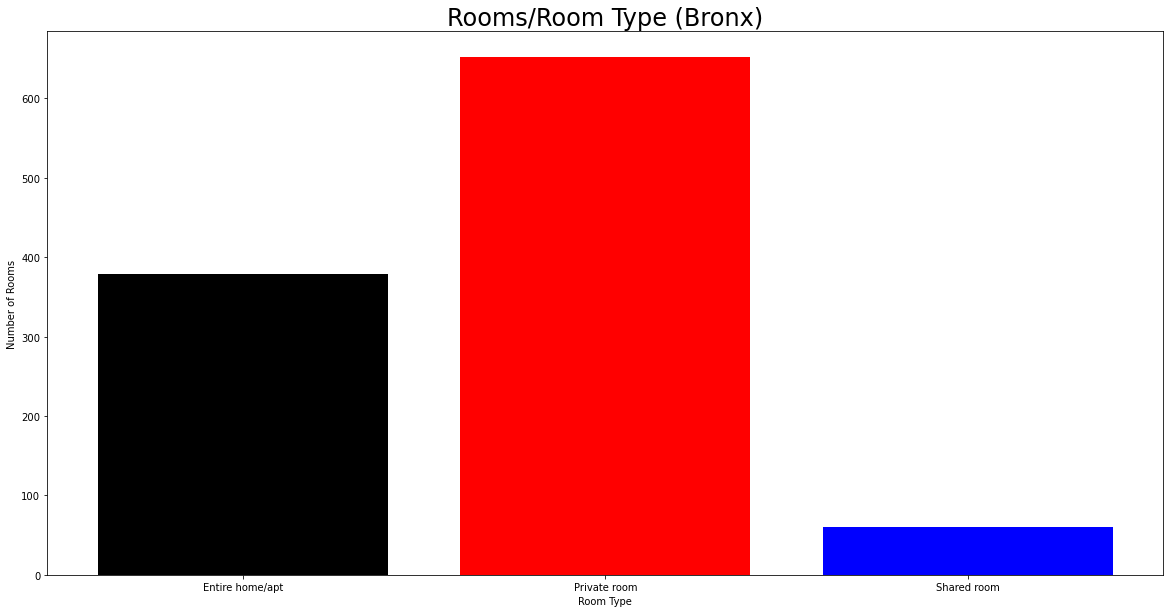

In [49]:
# bar chart showing the number of room types in the Bronx
bronx = air_bnb[air_bnb['neighbourhood_group'] == 'Bronx']
room_counts = bronx.groupby('room_type').count()['id']
room_counts
plt.figure(figsize=(20,10))
plt.bar(room_counts.index, room_counts, color=['k', 'r', 'b'])
plt.title('Rooms/Room Type (Bronx)', fontsize=24)
plt.xlabel('Room Type')
plt.ylabel('Number of Rooms')
plt.show()

# Final Conclusion

In this cell, write your final conclusion for each of the questions asked.

Also, if you uncovered some more details that were not asked above, please discribe them here.

-- Add your conclusion --